In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!unzip california_housing.zip

Archive:  california_housing.zip
  inflating: housing.csv             


In [3]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [99]:
df = housing.groupby('ocean_proximity').mean().reset_index()
df

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
1,INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
2,ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
3,NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
4,NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


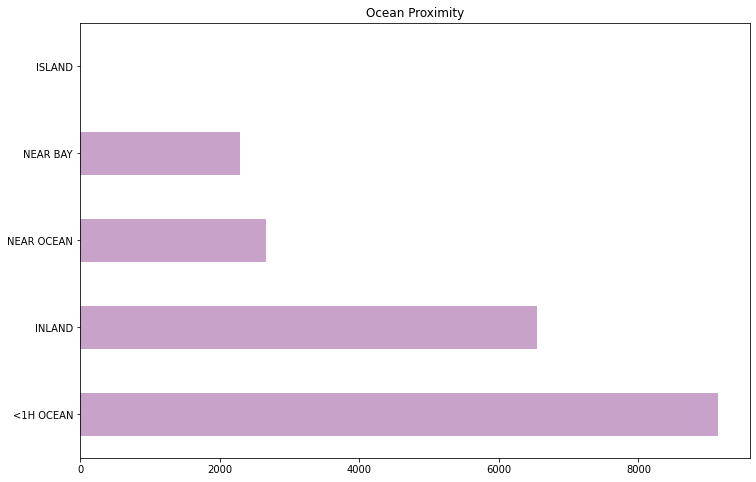

In [36]:
housing['ocean_proximity'].value_counts().plot(kind = 'barh', color = '#C8A2C8', title = 'Ocean Proximity', figsize = (12, 8))

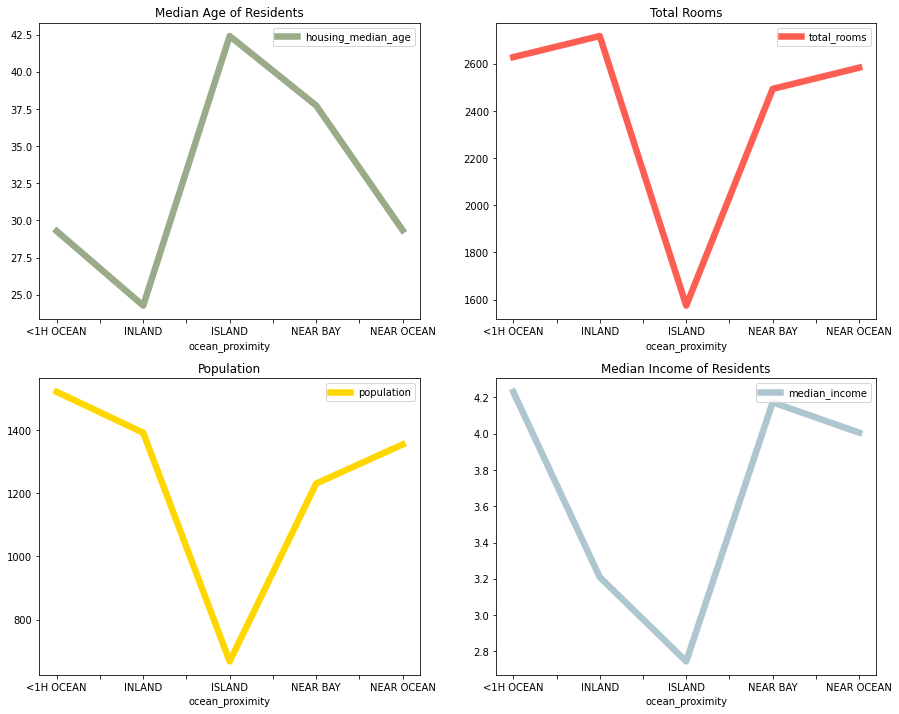

In [74]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 12))
df.plot(ax = axes[0, 0], kind = 'line', x = 'ocean_proximity', y = 'housing_median_age', color = '#9AAB89', linewidth = 6.5, title = 'Median Age of Residents')
df.plot(ax = axes[0, 1], kind = 'line', x = 'ocean_proximity', y = 'total_rooms', color = '#FD5E53', linewidth = 6.5, title = 'Total Rooms')
df.plot(ax = axes[1, 0], kind = 'line', x = 'ocean_proximity', y = 'population', color = '#FFD700', linewidth = 6.5, title = 'Population')
df.plot(ax = axes[1, 1], kind = 'line', x = 'ocean_proximity', y = 'median_income', color = '#AEC6CF', linewidth = 6.5, title = 'Median Income of Residents')

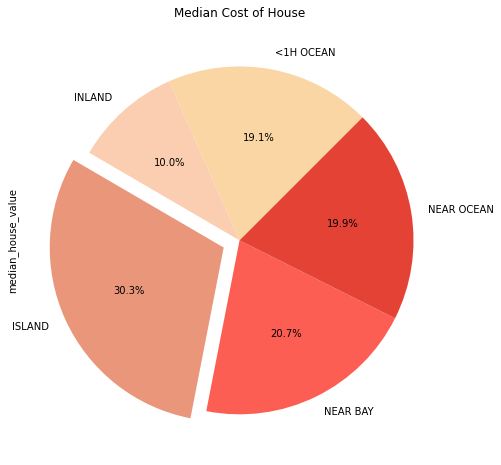

In [100]:
my_explode = (0, 0, 0.1, 0, 0)
colors_list = ['#fad6a5', '#FBCEB1', '#e9967a', '#fd5e53', '#e34234']
plt = df['median_house_value'].plot.pie(startangle = 45, autopct = '%1.1f%%', explode = my_explode, figsize = (12, 8), colors = colors_list, labels = df.ocean_proximity, title = 'Median Cost of House')